## Decision Tree and Random Forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


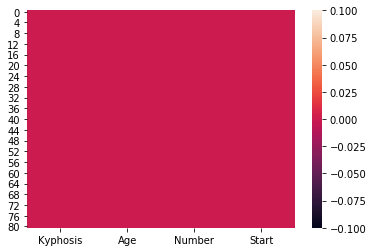

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [9]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [10]:
X=df[['Age', 'Number', 'Start']]
y=df['Kyphosis']

In [11]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [12]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

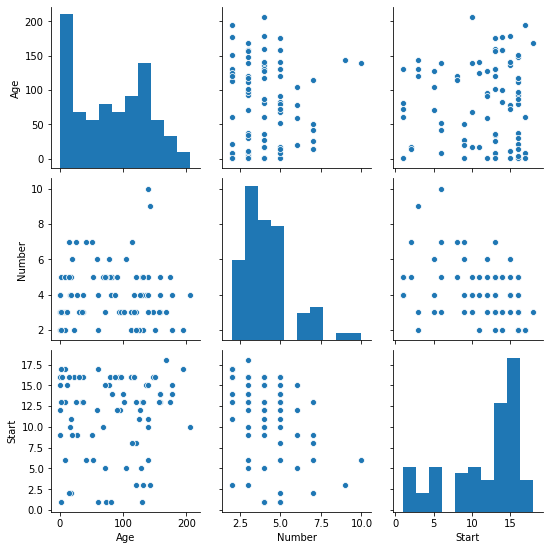

In [32]:
sns.pairplot(df)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree=DecisionTreeClassifier()

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
pred=dtree.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.94      0.73      0.82        22
     present       0.25      0.67      0.36         3

    accuracy                           0.72        25
   macro avg       0.60      0.70      0.59        25
weighted avg       0.86      0.72      0.77        25



In [39]:
print(confusion_matrix(y_test,pred))

[[16  6]
 [ 1  2]]


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc=RandomForestClassifier()

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
pred=rfc.predict(X_test)

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.95      0.82      0.88        22
     present       0.33      0.67      0.44         3

    accuracy                           0.80        25
   macro avg       0.64      0.74      0.66        25
weighted avg       0.87      0.80      0.83        25



In [45]:
print(confusion_matrix(y_test,pred))

[[18  4]
 [ 1  2]]


In [46]:
p=np.array(y_test)

In [47]:
p=np.array(y_test)
c=0
for i in range(len(p)):
    if pred[i]==p[i]:
        c=c+1
    else:
        pass
print(c)

20


In [48]:
len(p)

25